In [2]:
%cd /content/drive/MyDrive/Github/FL-project

/content/drive/MyDrive/Github/FL-project


In [2]:
! python main.py --dataset 'iddaCB' --model 'deeplabv3_mobilenetv2' --num_rounds 1

Initializing model...
Downloading: "https://github.com/d-li14/mobilenetv2.pytorch/raw/master/pretrained/mobilenetv2_1.0-0c6065bc.pth" to /root/.cache/torch/hub/checkpoints/mobilenetv2_1.0-0c6065bc.pth
100% 13.5M/13.5M [00:00<00:00, 112MB/s] 
Traceback (most recent call last):
  File "/content/drive/MyDrive/Github/FL-project/main.py", line 200, in <module>
    main()
  File "/content/drive/MyDrive/Github/FL-project/main.py", line 185, in main
    model = model_init(args)
  File "/content/drive/MyDrive/Github/FL-project/main.py", line 45, in model_init
    return deeplabv3_mobilenetv2(num_classes=get_dataset_num_classes(args.dataset))
  File "/content/drive/MyDrive/Github/FL-project/models/deeplabv3.py", line 35, in deeplabv3_mobilenetv2
    state_dict = load_state_dict_from_url(model_urls[width_mult], progress=True)
  File "/usr/local/lib/python3.9/dist-packages/torch/hub.py", line 750, in load_state_dict_from_url
    return torch.load(cached_file, map_location=map_location)
  File "/us

In [3]:
from main import *
import argparse

In [4]:
class Args():
  def __init__(self, dataset, model):
    self.dataset = dataset
    self.model = model

args=Args('iddaCB', model = 'deeplabv3_mobilenetv2')

In [5]:
trainAloneDataset, testAloneDatasets = get_datasets(args)

In [6]:
ds = trainAloneDataset[0]

In [7]:
torch.randint(low = 0, high = 600, size = (1,)).item()

416

In [8]:
rnd = torch.randint(low = 0, high = 600, size = (1,)).item()
ds[rnd][1].unique()

tensor([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 15, 16, 18, 20, 21],
       dtype=torch.uint8)

In [9]:
ds[rnd][1]

tensor([[20, 20, 20,  ..., 20, 20, 20],
        [20, 20, 20,  ..., 20, 20, 20],
        [20, 20, 20,  ..., 20, 20, 20],
        ...,
        [10, 10, 10,  ..., 10, 10, 10],
        [10, 10, 10,  ..., 10, 10, 10],
        [10, 10, 10,  ..., 10, 10, 10]], dtype=torch.uint8)

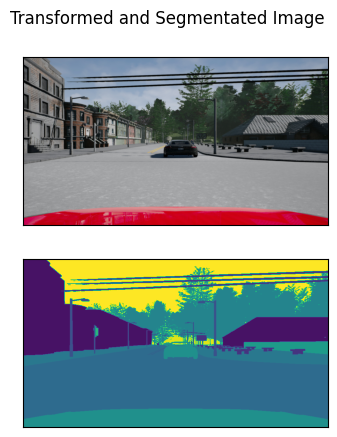

In [10]:
rnd = torch.randint(low = 0, high = 600, size = (1,)).item()
ds.showImgAndLable(0)

In [13]:
from main import *
import argparse

args=Args('iddaCB', model = 'deeplabv3_mobilenetv2')

In [14]:
model = model_init(args)

RuntimeError: ignored

In [ ]:
from torch.utils.data import DataLoader
train_loader = DataLoader(ds, batch_size = 2, shuffle=False, drop_last=True)

In [ ]:
for images, labels in train_loader:
  outputModel = model(images)
  label_trues = labels
  break

In [ ]:
outputModel['out'].shape

In [ ]:
label_trues.shape

In [ ]:
len([255, 2, 4, 255, 11, 5, 0, 0, 1, 8, 13, 3, 7, 6, 255, 255, 15, 14, 12, 9, 10])

In [ ]:
from torch import from_numpy
import numpy as np

eval_classes = list(range(1,24))
classes = eval_classes
mapping = np.zeros((256,), dtype=np.int64) + 255
for i, cl in enumerate(classes):
  mapping[cl] = i
target_transform = lambda x: from_numpy(mapping[x])

In [ ]:
mapping

In [ ]:
len(list(range(1,24)))

In [ ]:
mapping[0]

In [ ]:
target_transform(torch.tensor(range(0,29)) )

In [ ]:
for i, cl in enumerate(classes):
  mapping[i] = cl
self.target_transform = lambda x: from_numpy(mapping[x])
else:
classes = eval_classes
mapping = np.zeros((256,), dtype=np.int64) + 255
for i, cl in enumerate(classes):
  mapping[cl] = i
self.target_transform = lambda x: from_numpy(mapping[x])

In [ ]:
F.cross_entropy(outputModel['out'], label_trues.long())

In [ ]:
label_trues.shape

In [ ]:
imagesTensor = ds[0]

In [ ]:
outputModel['out'][0].shape

In [ ]:
channel = outputModel['out'][0][0]

In [ ]:
channel.unique()

In [ ]:
import torch.nn.functional as F

In [ ]:
output = outputModel['out']
output.shape

In [20]:
output = outputModel['out'][0]
output_predictions = output.argmax(0)
output_predictions.shape

torch.Size([512, 928])

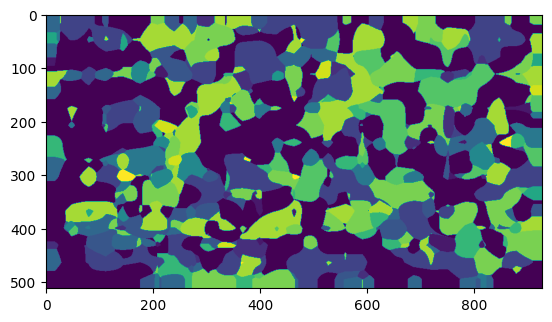

In [21]:
import matplotlib.pyplot as plt
plt.imshow(output_predictions.detach().numpy())

In [22]:
for images, labels in train_loader:
  outputModel = model(images)
  label_trues = labels.numpy()
  break

In [23]:
output = outputModel['out'][0]
output_predictions = output.argmax(0)
label_preds = output_predictions.unsqueeze(0)
label_preds = label_preds.numpy()
label_preds.shape

(1, 512, 928)

In [24]:
label_trues = np.expand_dims(label_trues[0], axis=0)
label_trues.shape

(1, 512, 928)

In [25]:
len(label_trues)

1

Il modello restituisce un channel per ogni classe di altezza e larghezza uguale all'input

In [27]:
set_metrics(args)['eval_train'].update(label_trues, label_preds)

In [28]:
print(set_metrics(args)['eval_train'].confusion_matrix_to_text())


0 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
4 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
5 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
6 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
7 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
8 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
9 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
10 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
11 : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [15]:
import numpy as np
np.bincount([1,2,2,2,3,4,5,5,5,5,5,5], minlength=10)

array([0, 1, 3, 1, 1, 6, 0, 0, 0, 0])

In [67]:
np.bincount([1,2,2,2,3,4,5,5,5,5,5,5])

array([0, 1, 3, 1, 1, 6])

In [16]:
label_true = np.array([[[0,0,1,0],[0,1,0,0],[0,1,1,0]]])
label_pred = np.array([[[0,0,0,0],[0,1,0,0],[0,1,1,0]]])
label_true[0].flatten()

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [87]:
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

In [17]:
label_true = np.array([[0,0,1,0],[0,1,0,0],[0,1,1,0]]).flatten()
label_pred = np.array([[0,0,0,0],[0,1,0,0],[0,1,1,0]]).flatten()

mask = (label_true >= 0) & (label_true < n_classes)
hist = np.bincount(
            n_classes * label_true[mask].astype(int) + label_pred[mask],
            minlength = n_classes ** 2,
        ).reshape(n_classes, n_classes)
hist

NameError: ignored

In [98]:
freq = hist.sum(axis=1) / hist.sum()
freq
#fwavacc = (freq[freq > 0] * iu[freq > 0]).sum()
[0.66666667, 0.33333333] * 

array([0.66666667, 0.33333333])

In [20]:
def fast_hist(label_true, label_pred):
        mask = (label_true >= 0) & (label_true < n_classes)
        hist = np.bincount(
            n_classes * label_true[mask].astype(int) + label_pred[mask],
            minlength = n_classes ** 2,
        ).reshape(n_classes, n_classes)
        return hist

In [21]:
label_trues = np.array([[[0,0,1,0],[0,1,0,0],[0,1,1,0]]])

label_preds = np.array([[[0,0,0,0],[0,1,0,0],[0,1,1,0]]])

n_classes = 2
confusion_matrix = np.zeros(2)


for lt, lp in zip(label_trues, label_preds):


  confusion_matrix += fast_hist(lt.flatten(), lp.flatten())

mask = (label_true >= 0) & (label_true < n_classes)
hist = np.bincount(
            n_classes * label_true[mask].astype(int) + label_pred[mask],
            minlength = n_classes ** 2,
        ).reshape(n_classes, n_classes)
hist

ValueError: ignored

In [24]:
%cd /content/drive/MyDrive/Github/FL-project

/content/drive/MyDrive/Github/FL-project


In [27]:
from main import *
import argparse
from utils.stream_metrics import *

args=Args('iddaCB', model = 'deeplabv3_mobilenetv2')

In [36]:
metriche = StreamSegMetrics(4, "Mean IoU")

In [37]:
label_trues = np.array([[[0,3,1,0],[0,1,0,3],[2,1,1,0]]])
label_preds = np.array([[[0,0,0,0],[0,1,0,3],[2,1,1,0]]])
metriche.reset()
metriche.update(label_trues, label_preds)

In [38]:
metriche.get_results()

{'Total samples': 1,
 'Overall Acc': 0.8333333333333334,
 'Mean Acc': 0.812499590625303,
 'Mean Precision': 0.9285708197284226,
 'FreqW Acc': 0.7142854842688332,
 'Mean IoU': 0.7410710436865211,
 'Class IoU': {0: 0.7142856122449125,
  1: 0.7499998125000469,
  2: 0.9999990000010001,
  3: 0.499999750000125},
 'Class Acc': {0: 0.99999980000004,
  1: 0.7499998125000469,
  2: 0.9999990000010001,
  3: 0.499999750000125},
 'Class Prec': {0: 0.7142856122449125,
  1: 0.9999996666667778,
  2: 0.9999990000010001,
  3: 0.9999990000010001}}

In [39]:
print(metriche.confusion_matrix_to_text())


0 : [5.0, 0.0, 0.0, 0.0]
1 : [1.0, 3.0, 0.0, 0.0]
2 : [0.0, 0.0, 1.0, 0.0]
3 : [1.0, 0.0, 0.0, 1.0]


In [44]:
trainAloneDataset, testAloneDatasets = get_datasets(args)
ds = trainAloneDataset[0]

In [55]:
ds[0][1].shape

torch.Size([512, 928])

In [63]:
label = ds[0][1].unsqueeze(0)
output = torch.rand(size = (1, 16, 512, 928))

In [72]:
label

tensor([[[ 1,  1,  1,  ..., 20, 20, 20],
         [ 1,  1,  1,  ..., 20, 20, 20],
         [ 1,  1,  1,  ..., 20, 20, 20],
         ...,
         [10, 10, 10,  ..., 10, 10, 10],
         [10, 10, 10,  ..., 10, 10, 10],
         [10, 10, 10,  ..., 10, 10, 10]]], dtype=torch.uint8)

In [64]:
label.shape

torch.Size([1, 512, 928])

In [65]:
output.shape

torch.Size([1, 16, 512, 928])

In [1]:
from centalized import *


ModuleNotFoundError: ignored

In [74]:
toIgnore = [0, 3, 6, 14, 15, 21, 22, 23]
originale =   [0,   1, 2,   3, 4, 5,   6, 7, 8, 9, 10, 11, 12, 13,  14, 15,  16, 17 ,18, 19, 20,  21,  22,  23]
trasformato = [255, 0, 1, 255, 2, 3, 255, 4, 5, 6,  7,  8,  9, 10, 255, 255,  11, 12, 13, 14, 15, 255, 255, 255]
def get_mapping():
        classes = trasformato
        mapping = np.zeros((256,), dtype=np.int64) + 255
        for i, cl in enumerate(classes):
            mapping[i] = cl
        return lambda x: torch.from_numpy(mapping[x])

In [76]:
trasforma = get_mapping()
trasforma(label).unique()

tensor([  0,   2,   3,   4,   5,   6,   7,   9,  10,  14,  15, 255])

In [77]:
loss_fn = nn.CrossEntropyLoss(ignore_index = 255)
loss_fn(output, trasforma(label).long())

tensor(2.8113)

In [40]:
import torch.nn as nn
import torch

num_classes = 5
ignore_index = -1  # set ignore_index to -1

loss_fn = nn.CrossEntropyLoss(ignore_index=ignore_index)

# Define the true labels and predicted probabilities
labels = torch.tensor([0, 1, 2, 3, 4, 1, 2])  # example labels
predictions = torch.tensor([
    [0.1, 0.2, 0.3, 0.2, 0.2],  # prediction for example 1
    [0.2, 0.1, 0.3, 0.3, 0.1],  # prediction for example 2
    [0.2, 0.3, 0.2, 0.1, 0.2],  # prediction for example 3
    [0.4, 0.2, 0.1, 0.1, 0.2],  # prediction for example 4
    [0.1, 0.3, 0.3, 0.2, 0.1],  # prediction for example 5
    [0.3, 0.1, 0.4, 0.2, 0.0],  # prediction for example 6
    [0.2, 0.1, 0.5, 0.1, 0.1],  # prediction for example 7
])

# Set the indices of classes B and D to -1 (the ignore_index)
labels[labels == 1] = ignore_index
labels[labels == 3] = ignore_index

# Compute the loss
loss = loss_fn(predictions, labels)
print(loss)

tensor(1.5896)


In [1]:
%cd /content/drive/MyDrive/Github/FL-project

/content/drive/MyDrive/Github/FL-project


In [2]:
from main import *
import argparse
from centralized import Centralized
from client import *

In [3]:
class Args():
  def __init__(self, dataset, model, bs, hnm, num_epochs):
    self.dataset = dataset
    self.model = model 
    self.bs = bs
    self.hnm = hnm
    self.num_epochs = num_epochs

args = Args('iddaCB', model = 'deeplabv3_mobilenetv2', bs = 16, hnm = False, num_epochs = 1)

In [4]:
trainAloneDataset, testAloneDatasets = get_datasets(args)
ds = trainAloneDataset[0]

In [5]:
  #instanziamo il modello 
model = model_init(args)

In [6]:
centralized = Centralized(args,ds,model)
#centralized.train()
state_dict = torch.load('modelliSalvati/checkpoint.pth')
model.classifier.load_state_dict(state_dict)

<All keys matched successfully>

In [7]:
from utils.stream_metrics import StreamSegMetrics
metric = StreamSegMetrics(16, 'centralizzato')

In [8]:
centralized.test(metric)

ValueError: ignored

In [60]:
torch.save(centralized.model.classifier.state_dict(), 'modelliSalvati/checkpoint.pth')

In [ ]:
state_dict = torch.load('modelliSalvati/checkpoint.pth')
self.model.classifier.load_state_dict(state_dict)

In [56]:
from utils.stream_metrics import StreamSegMetrics
metric = StreamSegMetrics(16, 'centralizzato')

In [58]:
centralized.test(metric)

NotImplementedError: ignored

In [44]:
ds

Dataset IDDADataset
    Number of datapoints: 600
    Root location: data/idda
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(512, 928), scale=(0.5, 2.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [45]:
from torch.utils.data import DataLoader
train_loader = DataLoader(ds, batch_size = 2, shuffle = False, drop_last = True)

In [52]:
next(iter(train_loader))[0].shape

torch.Size([2, 3, 512, 928])

In [53]:
immagini = next(iter(train_loader))[0]
immagini = immagini.cuda()
output = modello(immagine)
output_predictions = output.argmax(0)

ValueError: ignored

In [29]:
modello = centralized.model

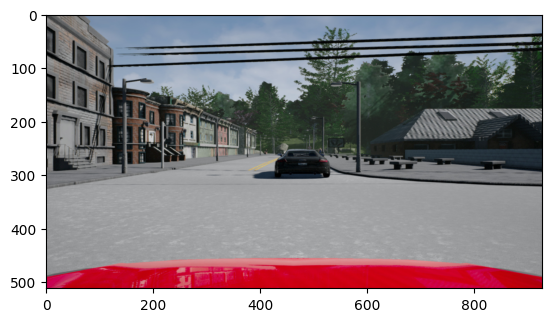

In [21]:
def unNormalize(tensorImage, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
        for t, m, s in zip(tensorImage, mean, std):
            t.mul_(s).add_(m)
        return tensorImage

import matplotlib.pyplot as plt
plt.imshow(unNormalize(ds[0][0]).permute(1, 2, 0))